In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
os.chdir("C:\\Users\\Hunsoo\\Desktop\\regression_practice\\Data")
dataset_path = os.path.join(os.getcwd(),"pvprediction_yeongam")
dataset_path

'C:\\Users\\Hunsoo\\Desktop\\regression_practice\\Data\\pvprediction_yeongam'

In [2]:
raw_dataset = pd.read_csv('pvprediction_yeongam.txt',sep="\t", header=0)
raw_dataset.head()

,point,year,day365,clock,temp,windspeed,winddirection,humidity,vaporpressure,dewpointtemperature,...,pv-4h,pv-3h,pv-2h,pv-1h,pv+0h,pv+1h,pv+2h,pv+3h,pv+4h,pv+5h
0,165,2015,1,0,-1.2,7.6,NaN,NaN,5.6,-1.2,...,0,0,0,0,0,0,0,0,0,0
1,165,2015,1,1,-1.8,10.4,NaN,NaN,5.4,-1.8,...,0,0,0,0,0,0,0,0,0,0
2,165,2015,1,2,-1.7,10.9,NaN,96.0,5.2,-2.2,...,0,0,0,0,0,0,0,0,0,0
3,165,2015,1,3,-1.6,11.6,NaN,75.0,4.1,-5.4,...,0,0,0,0,0,0,0,0,0,0
4,165,2015,1,4,-1.8,10.8,NaN,74.0,4.0,-5.8,...,0,0,0,0,0,0,0,0,0,5


In [3]:
raw_dataset.shape

(26280, 34)

In [4]:
raw_dataset.drop(raw_dataset[raw_dataset.clock<9].index,inplace=True)
raw_dataset.drop(raw_dataset[raw_dataset.clock>19].index,inplace=True)

In [5]:
raw_dataset.shape

(12045, 34)

In [6]:
raw_dataset.head()

,point,year,day365,clock,temp,windspeed,winddirection,humidity,vaporpressure,dewpointtemperature,...,pv-4h,pv-3h,pv-2h,pv-1h,pv+0h,pv+1h,pv+2h,pv+3h,pv+4h,pv+5h
9,165,2015,1,9,-2.0,9.7,NaN,90.0,4.8,-3.4,...,0,0,0,0,5,139,732,590,787,327
10,165,2015,1,10,-0.9,10.9,NaN,78.0,4.5,-4.2,...,0,0,0,5,139,732,590,787,327,588
11,165,2015,1,11,-1.1,8.5,NaN,94.0,5.3,-1.9,...,0,0,5,139,732,590,787,327,588,226
12,165,2015,1,12,-0.7,9.7,NaN,79.0,4.6,-3.8,...,0,5,139,732,590,787,327,588,226,69
13,165,2015,1,13,-1.6,9.6,NaN,94.0,5.1,-2.4,...,5,139,732,590,787,327,588,226,69,3


In [7]:
fields_to_drop = ['windspeed','cloud','lowcloud','pv-2h','pv+1h','pv+5h','pv+3h','pv+4h','point','year','sunshine','locarpressure','temp','irradiation','lst','snow','pv-3h','winddirection','humidity','vaporpressure','dewpointtemperature','seasurfacepressure','sijung','temp5cm','temp10cm','temp20','temp30cm','pv-5h','pv-4h']

data = raw_dataset.drop(fields_to_drop, axis=1)
data.head()

dataset = data.copy()
dataset.tail()

,day365,clock,pv-1h,pv+0h,pv+2h
26271,365,15,707,526,74
26272,365,16,526,316,8
26273,365,17,316,74,0
26274,365,18,74,8,0
26275,365,19,8,0,0


In [8]:
dataset.shape

(12045, 5)

In [9]:
dataset=dataset.dropna()

In [10]:
quant_features = ['day365','clock','pv-1h','pv+0h','pv+2h']

scaled_features = {}

#for each in quant_features:
#    mean, std = data[each].mean(), data[each].std()
#    scaled_features[each] = [mean, std]
#    data.loc[:, each] = (data[each] - mean)/std

for each in quant_features:
    maxx, minn = dataset[each].max(), dataset[each].min()
    scaled_features[each] = [maxx, minn]
    dataset.loc[:, each] = (dataset[each] - minn)/(maxx-minn)

In [11]:
dataset.shape

(12045, 5)

In [12]:
train_dataset = dataset.sample(frac=0.975,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


train_labels = train_dataset.pop('pv+2h')
test_labels = test_dataset.pop('pv+2h')

In [13]:
train_dataset.head()

,day365,clock,pv-1h,pv+0h
2390,0.271978,0.5,0.857536,0.837577
12828,0.464286,0.3,0.454921,0.600138
16022,0.829670,0.5,0.884377,0.808672
24161,0.758242,0.8,0.392292,0.140399
14657,0.673077,0.8,0.525809,0.344116


In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[dataset.shape[1]-1]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [15]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1 == 0: print('')
    print('.', end='')

EPOCHS = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


Instructions for updating:
Use tf.cast instead.

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
43,0.011336,0.066440,0.011336,0.012278,0.067072,0.012278,43
44,0.011273,0.066135,0.011273,0.011760,0.066503,0.011760,44
45,0.011297,0.066583,0.011297,0.012016,0.067765,0.012016,45
46,0.011260,0.066140,0.011260,0.011801,0.065863,0.011801,46
47,0.011210,0.066097,0.011210,0.012266,0.067931,0.012266,47


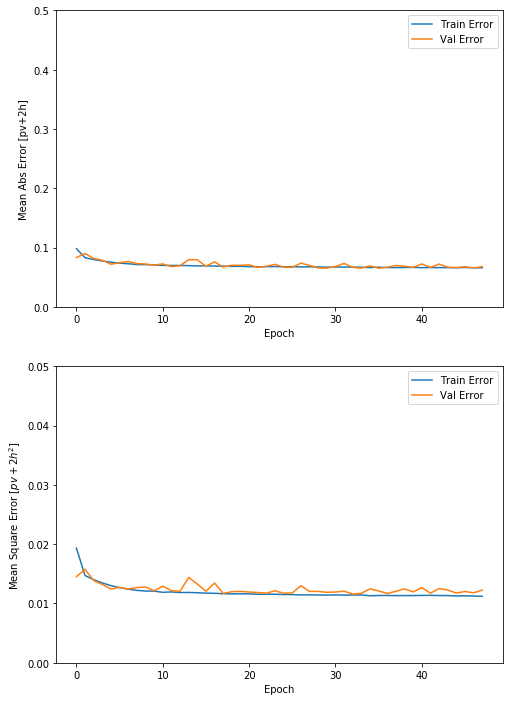

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(8,12))
  
  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pv+2h]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$pv+2h^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()

plot_history(history)

In [18]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("테스트 세트의 평균 절대 오차: {:5.2f} pv+2h".format(mae))

테스트 세트의 평균 절대 오차:  0.07 pv+2h


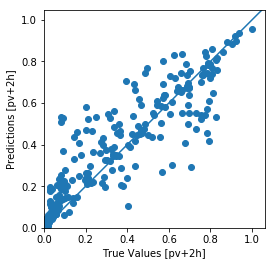

In [19]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pv+2h]')
plt.ylabel('Predictions [pv+2h]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 5000], [-100, 5000])

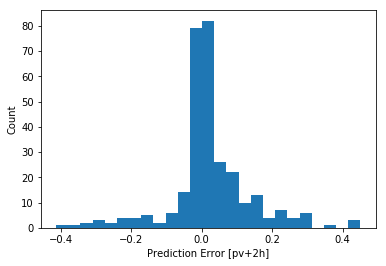

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [pv+2h]")
_ = plt.ylabel("Count")

In [21]:
array_test_labels=pd.Series(test_labels).values
array_test_predictions=pd.Series(test_predictions).values

In [22]:
rss=((array_test_labels-array_test_predictions)**2).sum()
mse=np.mean((array_test_labels-array_test_predictions)**2)
print("Final rmse value is =",np.sqrt(np.mean((array_test_labels-array_test_predictions)**2)))

Final rmse value is = 0.11924893623888609


In [23]:
print(np.corrcoef(array_test_labels,array_test_predictions))

[[1.         0.91910607]
 [0.91910607 1.        ]]


In [24]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

mape_vectorized_v2(array_test_labels,array_test_predictions)

C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


1.1559299639461216

In [25]:
max(test_labels)

1.0

In [26]:
def nmae(a, b, c): 
    mask = a != 0
    return (np.fabs(a - b)/max(c)/9)[mask].mean()

nmae(array_test_labels,array_test_predictions,test_labels)

0.010127492649714766

In [27]:
def nmae_wo_mask(a, b, c): 
    return (np.fabs(a - b)/max(c)/9).mean()

nmae_wo_mask(array_test_labels,array_test_predictions,test_labels)

0.008068224159310385

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(array_test_labels, array_test_predictions))
print(rms)

0.11924893623888609


In [26]:
array_test_labels

array([0.00000000e+00, 9.15347557e-02, 1.23881624e-02, 8.10048176e-01,
       5.98072953e-01, 2.22986924e-01, 9.77288369e-02, 5.54026153e-01,
       1.14246387e-01, 5.17549897e-01, 1.17687543e-01, 2.13351686e-01,
       8.09359945e-01, 5.23743978e-01, 7.06813489e-01, 6.53131452e-01,
       0.00000000e+00, 3.02133517e-01, 3.24845148e-01, 9.63523744e-03,
       7.51548520e-01, 8.70612526e-01, 7.92842395e-01, 1.17687543e-01,
       1.35581555e-01, 4.12250516e-01, 7.13007571e-01, 8.12112870e-01,
       8.21059876e-01, 8.07983482e-01, 6.66896077e-01, 2.72539573e-01,
       2.27804542e-01, 6.88231246e-04, 3.64762560e-02, 6.22161046e-01,
       1.08740537e-01, 2.31933930e-01, 8.25877495e-02, 4.37715072e-01,
       6.48313833e-01, 1.03922918e-01, 2.78045423e-01, 3.51686167e-01,
       6.12525809e-01, 7.74260151e-01, 4.41156228e-01, 4.10185822e-01,
       4.12938747e-03, 4.66620785e-01, 2.47763248e-01, 8.05230557e-02,
       7.03372333e-01, 0.00000000e+00, 8.36200964e-01, 2.28492774e-01,
      

In [27]:
array_test_predictions

array([-1.1281945e-02,  2.9703327e-02,  1.1796646e-02,  7.9842621e-01,
        4.4219235e-01,  3.0985475e-01,  8.3996445e-02,  5.7451385e-01,
        9.1204472e-02,  5.7002388e-02,  9.4653249e-02,  2.3943561e-01,
        8.5822296e-01,  7.4853909e-01,  7.2504073e-01,  6.7397225e-01,
       -5.1335171e-03,  3.2431069e-01,  3.6204129e-01,  2.4396703e-02,
        7.4646848e-01,  8.8187164e-01,  8.1968278e-01,  2.4876797e-01,
        8.6383894e-02,  4.1188040e-01,  2.7750227e-01,  8.1589097e-01,
        7.7827168e-01,  7.4971831e-01,  2.7260655e-01,  6.2732846e-01,
        3.8161680e-01, -1.1789642e-02,  2.9066853e-02,  5.2149481e-01,
        8.4123194e-02,  3.3119804e-01,  4.7692724e-02,  3.6668193e-01,
        5.0001848e-01,  1.8214144e-01,  2.8395474e-01,  4.8693016e-01,
        3.1014875e-01,  7.0637774e-01,  3.3361477e-01,  3.3363798e-01,
       -1.7582975e-02,  4.5032433e-01,  2.9162714e-01,  7.4552760e-02,
        5.6253529e-01, -1.7686568e-02,  7.6282936e-01,  2.4353948e-01,
      

In [28]:
mape_vectorized_v2(array_test_labels*100,array_test_predictions*100)

C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.7967387394585858